### **Importing all needed libraries**

In [1]:
#Importing all needed libraries
import pandas as pd
import numpy as np #Matric math
import tensorflow as tf #ML
from tensorflow.python.framework import ops
from random import randint
from numpy import array
from numpy import argmax
import keras.backend as K
from tensorflow.keras import models
from numpy import array_equal
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import Input
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import sys
import os
from scipy.io import loadmat
from scipy.io import loadmat

# sys.path.append(os.path.abspath("/Users/henda/anaconda3/Lib/site-packages"))
# from rnn_utils import *
# from public_tests import *
ops.reset_default_graph()

tf.compat.v1.reset_default_graph() #Clearning cache
sess=tf.compat.v1.InteractiveSession()




### **Import Training Data**

In [2]:
def load_files():
    full_data = pd.DataFrame()
    subjects_to_load = [1,3,4,6,8,9,10]
    last_value = 0  # Initialize the last value for column 0

    for i in subjects_to_load:
        mat = loadmat(f'/content/sample_data/Sub2sub {i}_Test.mat')
        data = pd.DataFrame(mat[f'Data{1}'])
        sc=data.iloc [:,[0,1,2,3,4, 5, 6, 7,8,9]]
        sc.iloc[:,0]=sc.iloc[:,0]+last_value
        last_value=sc.iloc[:,0].iloc[-1]
        sc['subject_num'] = [i] * len(sc)
        full_data = pd.concat([full_data, sc])
    return full_data

In [3]:
Data1 = load_files()
Data1

<ipython-input-2-0138cbce9192>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sc['subject_num'] = [i] * len(sc)


,0,1,2,3,4,5,6,7,8,9,subject_num
0,6.382944e+01,0.281690,0.489741,0.510686,0.007947,0.005985,0.011474,0.960326,0.354871,0.998716,1
1,1.506855e+02,0.281466,0.490153,0.510489,0.002410,0.005748,0.013646,0.941707,0.354519,0.998754,1
2,2.502471e+02,0.281326,0.490547,0.510161,0.006262,0.006098,0.009462,0.957901,0.354532,0.998865,1
3,3.500264e+02,0.281425,0.490610,0.509903,0.007739,0.003593,0.009989,0.940461,0.354570,0.998972,1
4,4.495862e+02,0.281496,0.490560,0.509720,0.011756,0.007291,0.014906,0.946249,0.354609,0.999221,1
...,...,...,...,...,...,...,...,...,...,...,...
6013,4.198324e+06,0.826517,0.281703,0.095461,0.100022,0.242943,0.073544,0.976094,0.740931,0.253248,10
6014,4.198424e+06,0.659365,0.103420,0.280458,0.120007,0.320219,0.099409,0.990625,0.526777,0.373180,10
6015,4.198524e+06,0.394867,0.112258,0.564379,0.129652,0.576716,0.169892,0.987485,0.292762,0.562120,10
6016,4.198623e+06,0.202238,0.226245,0.779111,0.155142,0.332961,0.231001,0.954506,0.175465,0.718226,10


In [4]:
# #Reading the training data Subject
# td = loadmat(r"/content/sample_data/Top3_Train.mat")

# D=pd.DataFrame(td[f'Data{1}'])
# D

Text(0.5, 1.0, 'Lateral Deltoid EMg signal')

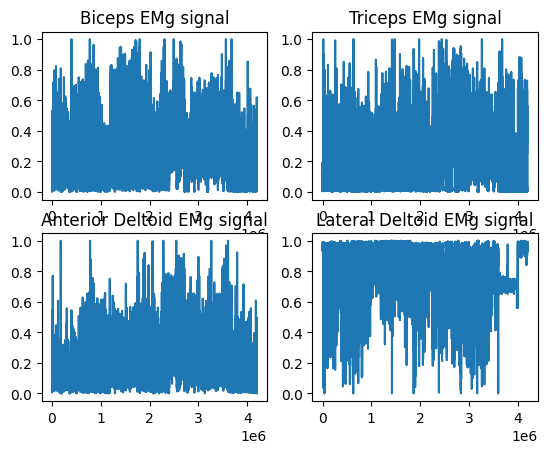

In [5]:
#Reading the training data Subject
# training_data = loadmat(r"/content/sample_data/Top3_Train.mat")

# Data1=training_data["Data1"]
Data1=np.array(Data1)

Time=Data1[0:(len(Data1))-3,0]
X=Data1[3:len(Data1),[1,2,8,9]]
Z=Data1[0:(len(Data1))-3,[4 ,5 ,6 ,7]]


del Data1
#####################################################

input_train=Z
output_train=X
time_train=Time



#printing the data
%matplotlib inline
figure, axis = plt.subplots(2, 2)


axis[0, 0].plot(time_train,input_train[:,0])
axis[0, 0].set_title('Biceps EMg signal')

axis[0, 1].plot(time_train,input_train[:,1])
axis[0, 1].set_title('Triceps EMg signal')

axis[1, 0].plot(time_train,input_train[:,2])
axis[1, 0].set_title('Anterior Deltoid EMg signal')

axis[1, 1].plot(time_train,input_train[:,3])
axis[1, 1].set_title('Lateral Deltoid EMg signal')

### **Import Test Data**

Text(0.5, 1.0, 'Lateral Deltoid EMg signal')

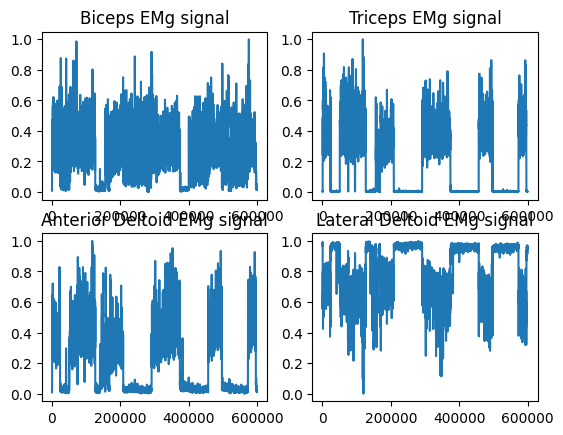

In [6]:
#Reading the test data
test_data = loadmat(r"/content/sample_data/Sub2sub 2_Test.mat")

Data1=test_data["Data1"]
Data1=np.array(Data1)

Time=Data1[0:(len(Data1))-3,0]
X=Data1[3:len(Data1),[1,2,8,9]]
Z=Data1[0:(len(Data1))-3,[4 ,5 ,6 ,7]]


del Data1
#####################################################

input_test=Z
output_test=X
time_test=Time

# Graphing the data
%matplotlib inline
figure, axis = plt.subplots(2, 2)


axis[0, 0].plot(time_test,input_test[:,0])
axis[0, 0].set_title('Biceps EMg signal')

axis[0, 1].plot(time_test,input_test[:,1])
axis[0, 1].set_title('Triceps EMg signal')

axis[1, 0].plot(time_test,input_test[:,2])
axis[1, 0].set_title('Anterior Deltoid EMg signal')

axis[1, 1].plot(time_test,input_test[:,3])
axis[1, 1].set_title('Lateral Deltoid EMg signal')

### **Checking size of arrays**

In [7]:
#Checking the dimensions of the training and testing data
print(input_train.shape)
print(output_train.shape)

print(input_test.shape)
print(output_test.shape)

#np.set_printoptions(threshold=sys.maxsize)
#print(output_train)


(42116, 4)
(42116, 4)
(6013, 4)
(6013, 4)


### **Reshaping of Training dataset**

In [8]:

# Assume data is your input array of shape (54151, 4)
sequence_length = 10
n_features = 4  # Number of features in your data

# Initialize a new array to store the sequences (input_train)
n_sequences = len(input_train) - sequence_length + 1
in_train = np.zeros((n_sequences, sequence_length, n_features))

# Fill the sequences array
for i in range(n_sequences):
    in_train[i] = input_train[i:i+sequence_length]
del n_sequences



    # Initialize a new array to store the sequences (input_test)
n_sequences = len(input_test) - sequence_length + 1
in_test = np.zeros((n_sequences, sequence_length, n_features))

# Fill the sequences array
for i in range(n_sequences):
    in_test[i] = input_test[i:i+sequence_length]

del n_sequences

output_train=output_train[0:len(in_train),:]
print(in_train.shape)
print(output_train.shape)
print(in_test.shape)


(42107, 10, 4)
(42107, 4)
(6004, 10, 4)


### **Creating model**

In [9]:
# from tensorflow import keras
# from keras.layers import Dense
# from keras.layers import Dropout

# #Creating model fully connected
# # model=Sequential()
# # model.add(Dense(4,activation='relu'))
# # model.add(Dense(50, activation='relu'))
# # model.add(Dropout(0.5))
# # model.add(Dense(3))

# #Lstm Model
# numResponses = 4
# numHiddenUnits = 200

# model = Sequential([
#     LSTM(numHiddenUnits, return_sequences=False, input_shape=(None, 4)),
#     Dense(50, activation='relu'),
#     Dropout(0.5),
#     Dense(numResponses),
# ])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, RepeatVector

# Assuming your settings
numResponses = 4
numHiddenUnits = 200
timesteps = 10  # You need to define the number of timesteps for the second LSTM

model = Sequential([
    LSTM(numHiddenUnits, return_sequences=False, input_shape=(None, 4)),  # first LSTM layer
    Dense(50, activation='relu'),  # Dense layer
    Dropout(0.5),  # Dropout layer
    RepeatVector(timesteps),  # Repeat the dense output to make it suitable for LSTM input
    LSTM(numHiddenUnits, return_sequences=False),  # Second LSTM layer
    Dense(numResponses),  # Final Dense layer for output
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### **Training Model**

In [10]:
#Early stopping to the model to avoid overfitting
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

#Compile the model
model.compile(optimizer='Adam',
            loss='mean_squared_error')
#train the model
history=model.fit(in_train,output_train,validation_split=0.20,
                 batch_size=16,
                 epochs=200,
                 verbose=1,
                callbacks=[early_stopping]

                 )


# Print the model summary
model.summary()

Epoch 1/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 0.0390 - val_loss: 0.0211
Epoch 2/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0224 - val_loss: 0.0200
Epoch 3/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0203 - val_loss: 0.0220
Epoch 4/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0188 - val_loss: 0.0217
Epoch 5/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0174 - val_loss: 0.0245
Epoch 6/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0161 - val_loss: 0.0235
Epoch 7/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0151 - val_loss: 0.0250
Epoch 8/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0144 - val_loss: 0.0246
Epoch 9/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0139 - val_loss: 0.0248
Epoch 10/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0130 - val_loss: 0.0263
Epoch 11/200
2106/2106 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0126 - val_loss: 0.0254
Epoch 12

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 200)                 │         164,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 200)                 │         200,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             804 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,126,964 (4.30 MB)

 Trainable params: 375,654 (1.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 751,310 (2.87 MB)

In [11]:
# keras.utils.plot_model

### **Testing Model**

In [12]:
#Model evaluation on testing dataset
#score=model.evaluate(in_test, output_test)
output_predicted=model.predict(in_test)

print(output_predicted.shape)
print(output_test.shape)


188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(6004, 4)
(6013, 4)


### **Making sure the size of test and predicted is the same**

In [13]:
# # Initialize a new array to store the sequences (input_test)
# n_sequences = len(output_test) - sequence_length + 1
# out_test = np.zeros((n_sequences, sequence_length, 3))

# # Fill the sequences array
# for i in range(n_sequences):
#     out_test[i] = output_test[i:i+sequence_length]

# del n_sequences
n=len(output_test)-len(output_predicted)
if n==0:
    out_test=output_test
else:
    out_test=output_test[:-n,:]

print(output_predicted.shape)
print(out_test.shape)


(6004, 4)
(6004, 4)


### **Printing the predicted vs actual**

In [14]:
for i in range(len(output_predicted)):
    print("actual=%s, Predicted=%s"%(out_test[i],output_predicted[i]))

Streaming output truncated to the last 5000 lines.
actual=[0.48953869 0.55798078 0.60420646 0.18889738], Predicted=[0.49622425 0.32345462 0.3452288  0.5377176 ]
actual=[0.48998284 0.50655181 0.60494467 0.18716658], Predicted=[0.49603564 0.28530613 0.3727731  0.47792345]
actual=[0.46230438 0.44811761 0.55847848 0.20846072], Predicted=[0.45065078 0.2653924  0.32385248 0.4898258 ]
actual=[0.40636831 0.39681991 0.47489688 0.25952578], Predicted=[0.43274382 0.26083612 0.3042508  0.4709251 ]
actual=[0.33112353 0.36606847 0.37980083 0.3360193 ], Predicted=[0.38497084 0.2681539  0.26061824 0.47614133]
actual=[0.24741929 0.3673767  0.29605802 0.42619965], Predicted=[0.3322749  0.2804426  0.23675908 0.49857068]
actual=[0.16982467 0.39857378 0.24010905 0.51712463], Predicted=[0.25534925 0.34471813 0.20625505 0.5591947 ]
actual=[0.11775341 0.44451623 0.21895614 0.59206209], Predicted=[0.21730238 0.42116064 0.19150397 0.6118907 ]
actual=[0.09014854 0.49025403 0.2171651  0.6401862 ], Predicted=[0.20

### **Getting CC**

In [15]:
#Shifting y to remove delay
# out_t=out_test[1:len(out_test)-5,2]
# out_p=output_predicted[6:len(output_predicted),2]
# output_predicted[:,2]=1-output_predicted[:,2]


In [16]:
# Getting cc
pearson=np.corrcoef(out_test[:,0],output_predicted[:,0])
print("CC (θ): %s" % pearson[1,0])

pearson=np.corrcoef(out_test[:,1],output_predicted[:,1])
print("CC (X): %s" % pearson[1,0])

pearson=np.corrcoef(out_test[:,2],output_predicted[:,2])
print("CC (Y): %s" % pearson[1,0])

pearson=np.corrcoef(out_test[:,3],output_predicted[:,3])
print("CC (V): %s" % pearson[1,0])

CC (θ): 0.3888903511047347
CC (X): 0.34223524425010965
CC (Y): 0.27178286574976246
CC (V): 0.523578977833362


## **Getting RMSE**

In [17]:
from sklearn.metrics import mean_squared_error
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(out_test[:,0],output_predicted[:,0])
print("RMSE (θ): %s" % math.sqrt(mse))

mse = sklearn.metrics.mean_squared_error(out_test[:,1],output_predicted[:,1])
print("RMSE(x): %s" % math.sqrt(mse))

mse = sklearn.metrics.mean_squared_error(out_test[:,2],output_predicted[:,2])
print("RMSE(Y): %s" % math.sqrt(mse))

mse = sklearn.metrics.mean_squared_error(out_test[:,3],output_predicted[:,3])
print("RMSE(v): %s" % math.sqrt(mse))

RMSE (θ): 0.21067022888778128
RMSE(x): 0.14953720385231192
RMSE(Y): 0.22359782886224028
RMSE(v): 0.24969545737160703


In [18]:
time_test=time_test[0:len(output_predicted)]
print(time_test.shape)


(6004,)


### **Drawing Actual vs predicted**

Text(0.5, 1.0, 'Elbow angle signal')

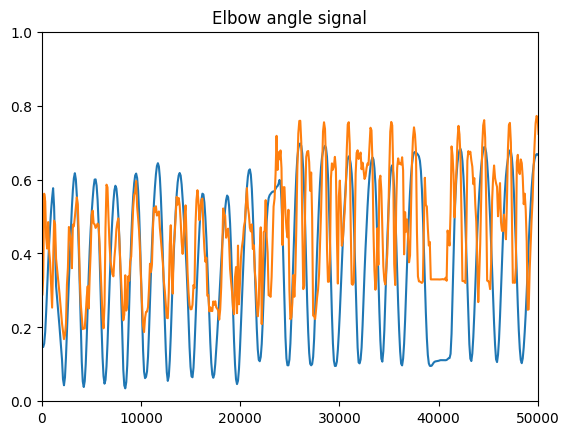

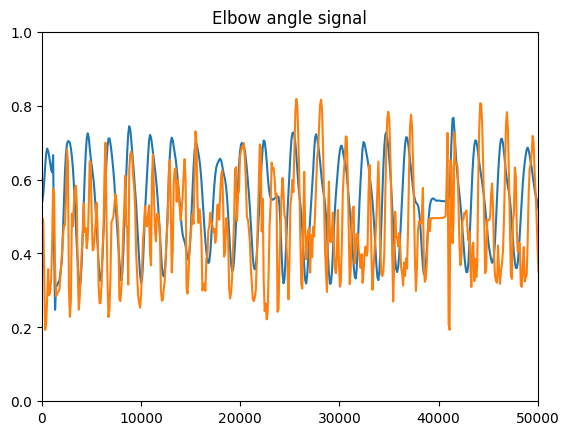

In [19]:
# Graphing the data
%matplotlib inline

fig1 = plt.figure("Figure 1")
plt.xlim(0, 50000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,0])
plt.plot(time_test,output_predicted[:,0])
plt.title('Elbow angle signal')

fig2 = plt.figure("Figure 2")
plt.xlim(0, 50000)
plt.ylim(0,1)
plt.plot(time_test,out_test[:,1])
plt.plot(time_test,output_predicted[:,1])
plt.title('Elbow angle signal')

# fig3 = plt.figure("Figure 3")
# plt.xlim(0, 50000)
# plt.ylim(0,1)
# plt.plot(time_test,out_test[:,2])
# plt.plot(time_test,output_predicted[:,2])
# # plt.plot(time_test[0:len(out_t)],out_t)
# # plt.plot(time_test[0:len(out_p)],out_p)
# plt.title('Elbow angle signal')
# plt.show

# fig3 = plt.figure("Figure 4")
# plt.xlim(0, 50000)
# plt.ylim(0,1)
# plt.plot(time_test,out_test[:,3])
# plt.plot(time_test,output_predicted[:,3])
# # plt.plot(time_test[0:len(out_t)],out_t)
# # plt.plot(time_test[0:len(out_p)],out_p)
# plt.title('Elbow Velocity signal')
# plt.show
